In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages')
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import GCRCatalogs

In [2]:
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


---------

In [32]:
# load catalog
gc = GCRCatalogs.load_catalog('buzzard_test')

In [33]:
print(sorted(gc.list_all_quantities()))

['Mag_true_Y_des_z01', 'Mag_true_g_des_z01', 'Mag_true_i_des_z01', 'Mag_true_r_des_z01', 'Mag_true_z_des_z01', 'convergence', 'dec', 'dec_true', 'ellipticity_1', 'ellipticity_1_true', 'ellipticity_2', 'ellipticity_2_true', 'galaxy_id', 'halo_id', 'halo_mass', 'is_central', 'mag_Y_des', 'mag_g_des', 'mag_i_des', 'mag_r_des', 'mag_z_des', 'magerr_Y_des', 'magerr_g_des', 'magerr_i_des', 'magerr_r_des', 'magerr_z_des', 'magnification', 'position_x', 'position_y', 'position_z', 'ra', 'ra_true', 'redshift', 'redshift_true', 'shear_1', 'shear_2', 'size', 'size_true', 'velocity_x', 'velocity_y', 'velocity_z']


In [34]:
data = Table(gc.get_quantities(['redshift_true', 'mag_g_des', 'mag_r_des', 'mag_i_des', 'mag_z_des', 'mag_Y_des']))

In [35]:
mask = (data['mag_r_des']<17.8) & (data['redshift_true']>0.104)
print(np.sum(mask))

19660


/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [36]:
# Check for SDSS-MGS equivalents
print(np.sum(data['mag_r_des']<18))
print(np.sum(data['mag_r_des']<18)/len(data))

23046
0.00139428743871


/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [37]:
gc.get_catalog_info()

{'catalog_path_template': {'truth': 'truth_v1.6/Chinchilla-0_lensed.{}.fits'},
 'catalog_root_dir': '/global/projecta/projectdirs/lsst/groups/CS/Buzzard/Buzzard-0/addgalspostprocess',
 'cosmology': {'H0': 70.0, 'Om0': 0.286},
 'creators': ['Joe DeRose', 'Risa Wechsler', 'Eli Rykoff', 'Matt Becker'],
 'description': 'This is a smaller version of the Buzzard galaxy catalog v1.6 (realization 0),\nwith only one healpixal, for testing purpose.\nRead more at https://confluence.slac.stanford.edu/x/4o2bDQ\n',
 'halo_mass_def': 'vir',
 'healpix_pixels': [42],
 'lightcone': True,
 'sky_area': 53.7148,
 'subclass_name': 'buzzard.BuzzardGalaxyCatalog'}

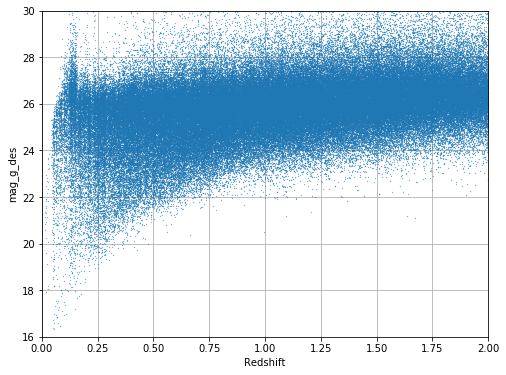

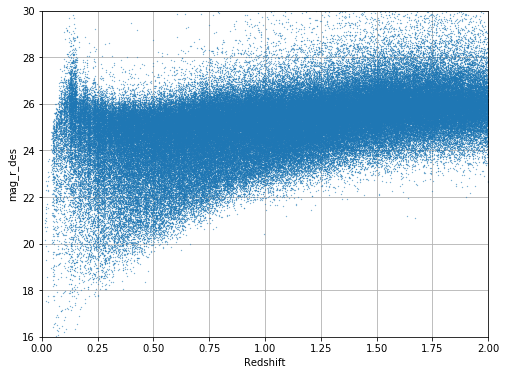

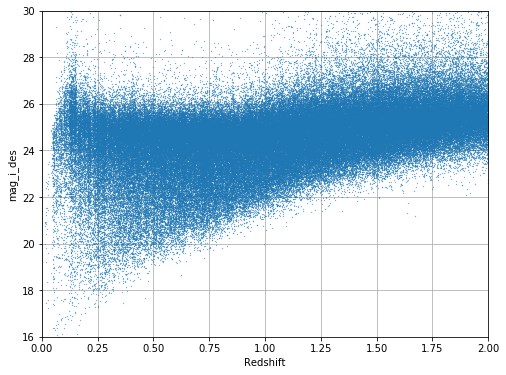

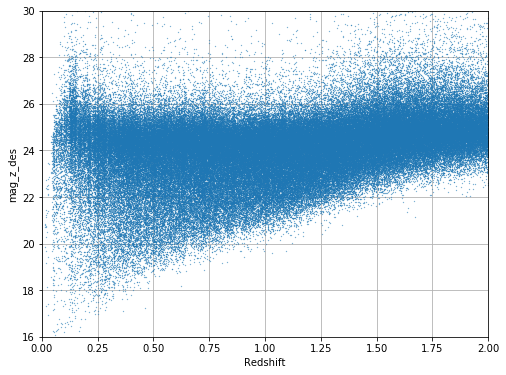

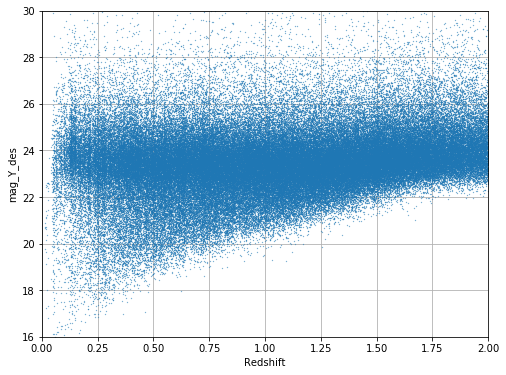

In [38]:
mag_list = ['mag_g_des', 'mag_r_des', 'mag_i_des', 'mag_z_des', 'mag_Y_des']
idx = np.arange(len(data))
idx = np.random.choice(idx, size=int(2e5), replace=False)

for mag_col in mag_list:
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 2.])
    plt.ylim([16.0, 30])
    plt.ylabel(mag_col)
    plt.xlabel('Redshift')
    plt.grid()

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in subtract


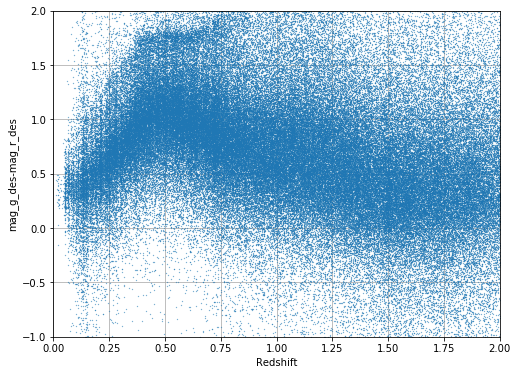

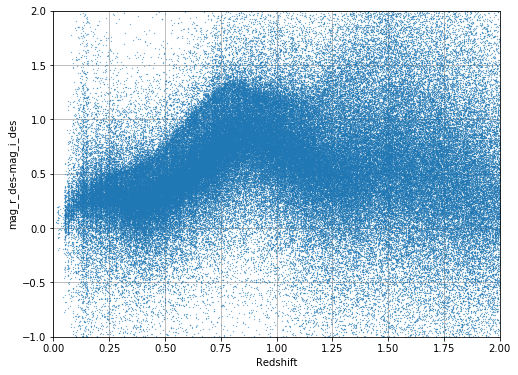

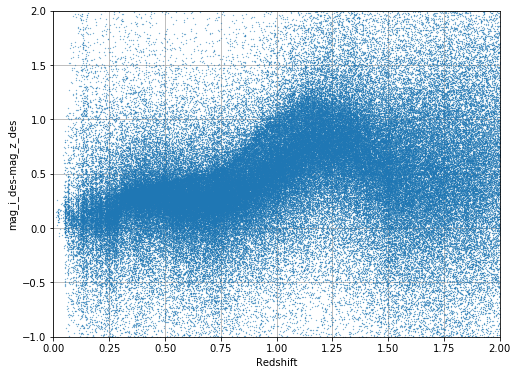

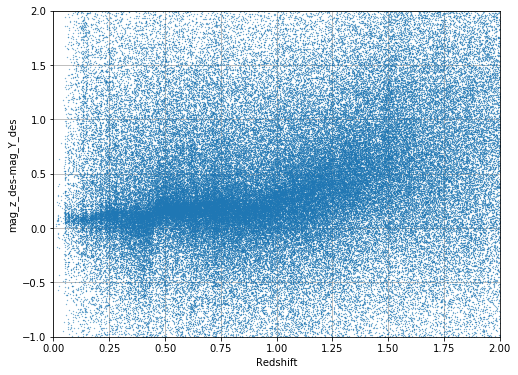

In [39]:
mag_list = ['mag_g_des', 'mag_r_des', 'mag_i_des', 'mag_z_des', 'mag_Y_des']
idx = np.arange(len(data))
idx = np.random.choice(idx, size=int(2e5), replace=False)

for index in range(len(mag_list)-1):
    mag_col1 = mag_list[index]
    mag_col2 = mag_list[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col1][idx]-data[mag_col2][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 2.])
    plt.ylim([-1, 2.])
    plt.ylabel(mag_col1+'-'+mag_col2)
    plt.xlabel('Redshift')
    plt.grid()

------------

In [3]:
# load catalog
gc = GCRCatalogs.load_catalog('protoDC2')

In [4]:
gc.get_catalog_info()

{'creators': ['Eve Kovacs',
  'Danila Korytov',
  'Katrin Heitmann',
  'Andrew Benson'],
 'description': 'ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.\nFor a description of the catalog and the methods, please see https://goo.gl/fXDQwP\n',
 'filename': '/global/projecta/projectdirs/lsst/groups/CS/descqa/catalog/ANL_AlphaQ_v2.1.2.hdf5',
 'lightcone': True,
 'subclass_name': 'alphaq.AlphaQGalaxyCatalog',
 'version': '2.1.2'}

In [5]:
print(sorted(gc.list_all_quantities()))

['Mag_true_Y_lsst_z0', 'Mag_true_g_lsst_z0', 'Mag_true_g_sdss_z0', 'Mag_true_i_lsst_z0', 'Mag_true_i_sdss_z0', 'Mag_true_r_lsst_z0', 'Mag_true_r_sdss_z0', 'Mag_true_u_lsst_z0', 'Mag_true_u_sdss_z0', 'Mag_true_z_lsst_z0', 'Mag_true_z_sdss_z0', 'convergence', 'dec', 'dec_true', 'ellipticity_1_bulge_true', 'ellipticity_1_disk_true', 'ellipticity_1_true', 'ellipticity_2_bulge_true', 'ellipticity_2_disk_true', 'ellipticity_2_true', 'ellipticity_bulge_true', 'ellipticity_disk_true', 'ellipticity_true', 'galaxy_id', 'halo_id', 'halo_mass', 'is_central', 'mag_Y_lsst', 'mag_g_lsst', 'mag_g_sdss', 'mag_i_lsst', 'mag_i_sdss', 'mag_r_lsst', 'mag_r_sdss', 'mag_u_lsst', 'mag_u_sdss', 'mag_z_lsst', 'mag_z_sdss', 'magnification', 'position_angle_true', 'position_x', 'position_y', 'position_z', 'ra', 'ra_true', 'redshift', 'redshift_true', 'sersic_bulge', 'sersic_disk', 'shear_1', 'shear_2', 'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true', 'size_minor_disk_true', 'size_true', 'stellar_mass

In [6]:
data = Table(gc.get_quantities(['ra', 'dec', 'redshift_true', 'mag_g_lsst', 'mag_r_lsst', 'mag_i_lsst', 'mag_z_lsst', 'mag_Y_lsst']))
print(len(data))

10022496


In [7]:
print(data['ra'].min())
print(data['ra'].max())
print(data['dec'].min())
print(data['dec'].max())

-2.49999
2.49999
-2.5
2.5


In [8]:
# Check for SDSS-MGS equivalents
print(np.sum(data['mag_r_lsst']<18))
print(np.sum(data['mag_r_lsst']<18)/len(data))

mask = (data['mag_r_lsst']<17.8) & (data['redshift_true']>0.104)
print(np.sum(mask))

4370
0.000436019131362
1979


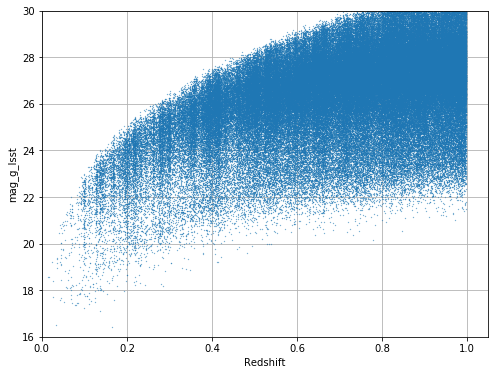

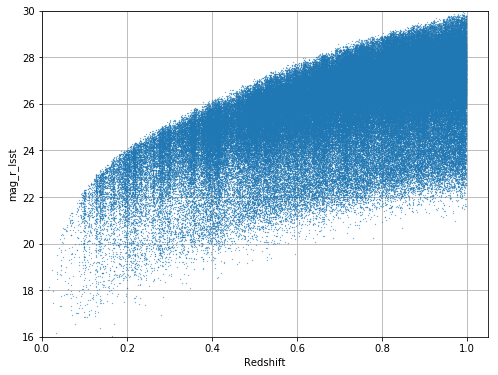

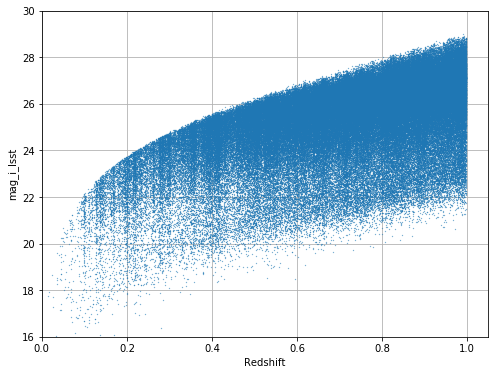

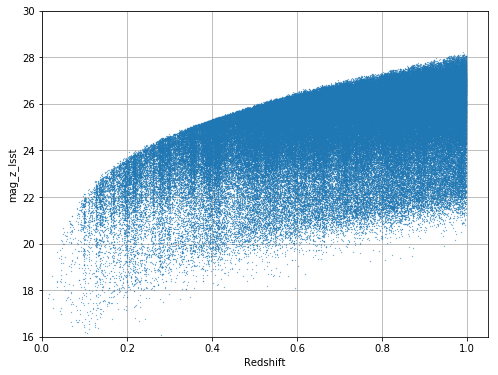

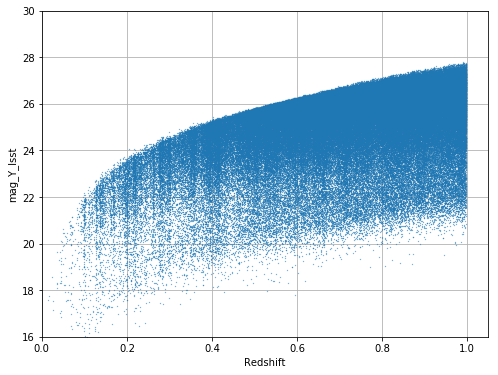

In [26]:
mag_list = ['mag_g_lsst', 'mag_r_lsst', 'mag_i_lsst', 'mag_z_lsst', 'mag_Y_lsst']
idx = np.arange(len(data))
idx = np.random.choice(idx, size=int(2e5), replace=False)

for mag_col in mag_list:
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 1.05])
    plt.ylim([16.0, 30])
    plt.ylabel(mag_col)
    plt.xlabel('Redshift')
    plt.grid()

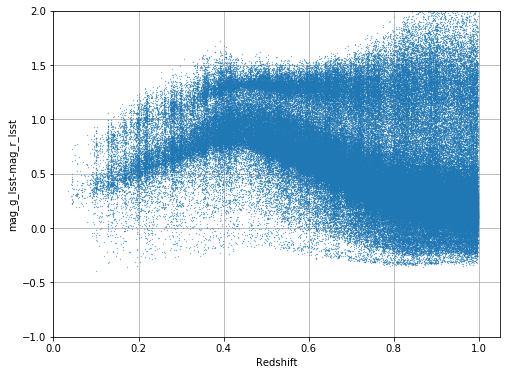

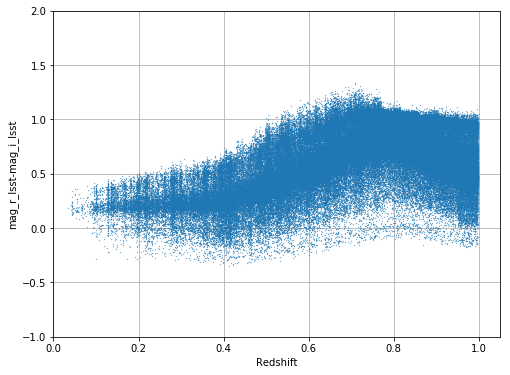

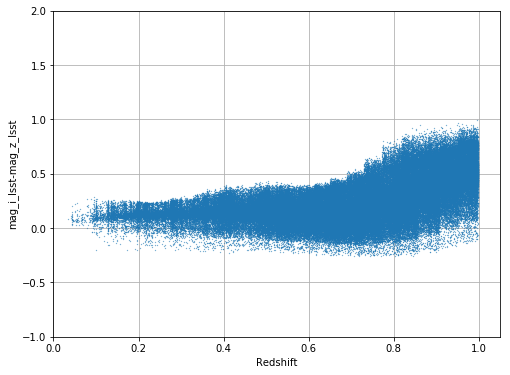

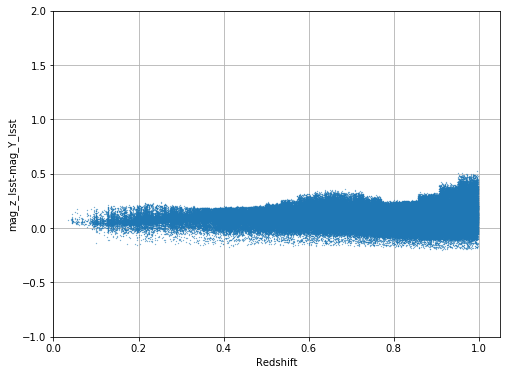

In [31]:
mag_list = ['mag_g_lsst', 'mag_r_lsst', 'mag_i_lsst', 'mag_z_lsst', 'mag_Y_lsst']
idx = np.arange(len(data))
idx = np.random.choice(idx, size=int(2e5), replace=False)

for index in range(len(mag_list)-1):
    mag_col1 = mag_list[index]
    mag_col2 = mag_list[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col1][idx]-data[mag_col2][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 1.05])
    plt.ylim([-1, 2.])
    plt.ylabel(mag_col1+'-'+mag_col2)
    plt.xlabel('Redshift')
    plt.grid()

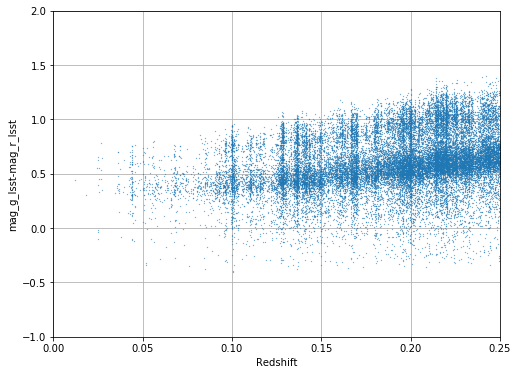

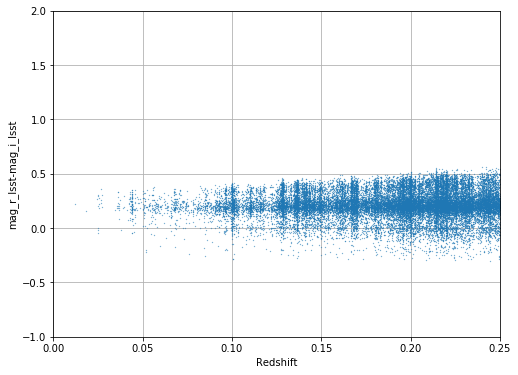

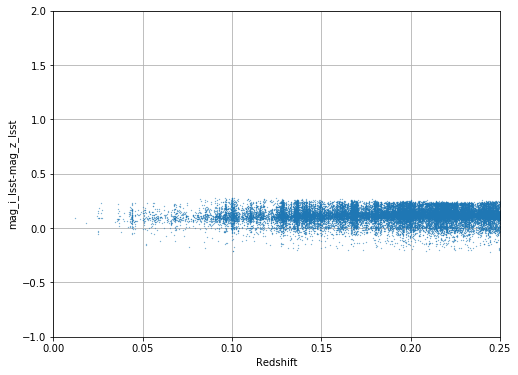

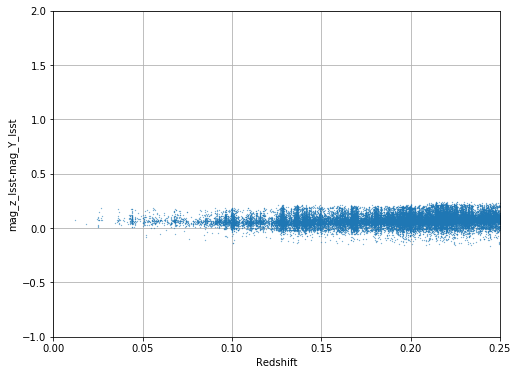

In [30]:
mag_list = ['mag_g_lsst', 'mag_r_lsst', 'mag_i_lsst', 'mag_z_lsst', 'mag_Y_lsst']
idx = np.arange(len(data))
idx = np.random.choice(idx, size=int(1e6), replace=False)

for index in range(len(mag_list)-1):
    mag_col1 = mag_list[index]
    mag_col2 = mag_list[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col1][idx]-data[mag_col2][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 0.25])
    plt.ylim([-1, 2.])
    plt.ylabel(mag_col1+'-'+mag_col2)
    plt.xlabel('Redshift')
    plt.grid()